In [1]:
#multi_agent.ipynb
#
#by Joe Hahn
#jmh.datasciences@gmail.com
#12 February 2018
#
#This uses Q-learning on multiple agents to demonstrate something...

In [2]:
#game settings
N_agents = 10                #number of agents
N_buckets = 50               #number of buckets
max_turns = 200             #max number of moves in single game
turn = 0                    #current turn
strategy = 'random'         #agents move randomly
rn_seed = 14                #seed for random number generator

In [3]:
#import game
from multi_agent import *
import time
time_start = time.time()

Using TensorFlow backend.


In [4]:
#import plotting libraries
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.5, font='DejaVu Sans')

In [5]:
#initialize system
environment = initialize_environment(rn_seed, max_turns, N_buckets, N_agents)
print 'environment = ', environment
state = initialize_state(environment)
print 'state = ', state
reward, bucket_value = get_reward(state)
print 'reward = ', reward
print 'bucket_value = ', bucket_value
state_vector = state2vector(state, environment)
print 'state_vector = ', state_vector
game_state = get_game_state(turn, environment)
print 'game_state = ', game_state

environment =  {'max_turns': 200, 'rn_seed': 14, 'N_agents': 10, 'bucket_params': {'p0': array([ 0.        ,  0.00020408,  0.00040816,  0.00061224,  0.00081633,
        0.00102041,  0.00122449,  0.00142857,  0.00163265,  0.00183673,
        0.00204082,  0.0022449 ,  0.00244898,  0.00265306,  0.00285714,
        0.00306122, -0.00326531, -0.00346939,  0.00367347,  0.00387755,
        0.00408163,  0.00428571,  0.0044898 ,  0.00469388,  0.00489796,
        0.00510204,  0.00530612,  0.0055102 ,  0.00571429,  0.00591837,
        0.00612245,  0.00632653,  0.00653061,  0.00673469,  0.00693878,
        0.00714286,  0.00734694,  0.00755102,  0.0077551 ,  0.00795918,
        0.00816327,  0.00836735,  0.00857143,  0.00877551,  0.00897959,
        0.00918367, -0.01267347, -0.01294898, -0.01322449, -0.0135    ]), 'sigma': array([ 0.        ,  0.01428571,  0.02020305,  0.02474358,  0.02857143,
        0.03194383,  0.03499271,  0.03779645,  0.0404061 ,  0.04285714,
        0.0451754 ,  0.04738035,  0.

In [6]:
#illustrate moving an agent
if ((N_agents == 3) and (N_buckets == 5)):
    environment = initialize_environment(rn_seed, max_turns, N_buckets, N_agents)
    state = initialize_state(environment)
    print 'state = ', state
    state_moved, action = move_agents(state, environment, strategy)
    print 'state_moved = ', state_moved
    print 'action = ', action
    reward, bucket_value = get_reward(state_moved)
    print 'reward = ', reward
    print 'bucket_value = ', bucket_value
    state_next = update_state(state_moved, bucket_value, environment)
    print 'state_next = ', state_next
    state_vector_next = state2vector(state_next, environment)
    print 'state_vector_next = ', state_vector_next

In [7]:
#play 1 game of randomly-moving agents and stash history in dataframe
strategy = 'random'
strategy = 'low'
memories = play_one_game(environment, strategy)
game_history = memories2timeseries(memories, environment)
print 'number of memories generated during 1 game = ', len(memories)
game_history.tail()

number of memories generated during 1 game =  200


,turn,reward,agent_value_0,agent_value_1,agent_value_2,agent_value_3,agent_value_4,agent_value_5,agent_value_6,agent_value_7,agent_value_8,agent_value_9
195,195,17.038381,0.387863,4.646260,1.939129,0.995409,0.526392,1.635702,0.970191,1.975881,1.134304,2.829680
196,196,16.727200,0.392574,4.673561,1.983277,1.015945,0.516373,1.661655,1.015911,1.775073,1.157705,2.846307
197,197,16.781810,0.381942,4.368710,1.983277,0.949676,0.502388,1.748537,1.077083,1.755299,1.145689,2.814600
198,198,16.886692,0.367665,4.381319,1.977354,0.959992,0.507846,1.781016,1.131946,1.683519,1.168431,2.822723
199,199,16.662436,0.363183,4.643271,1.975937,0.953196,0.501655,1.768407,1.131946,1.591591,1.154766,2.802740


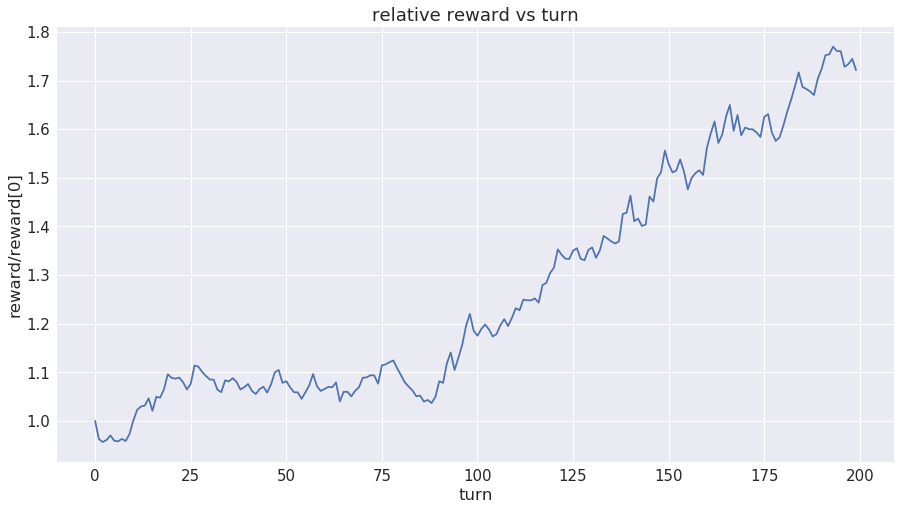

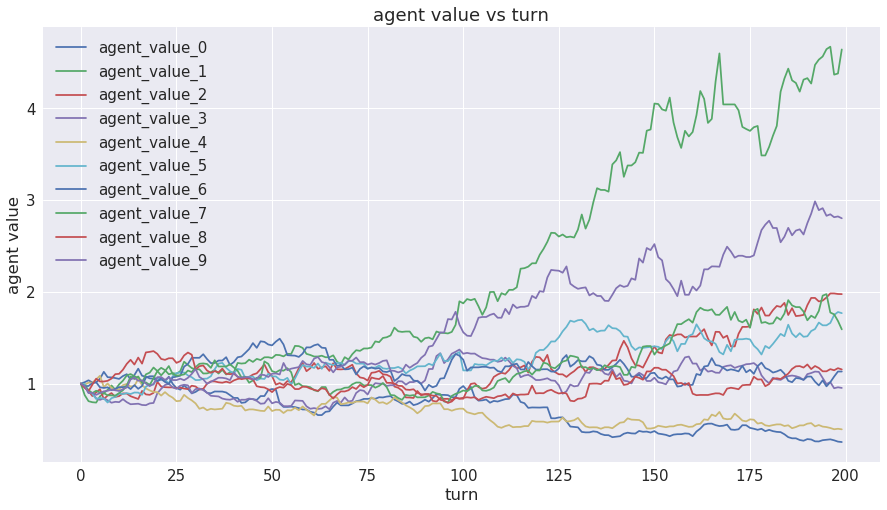

In [8]:
#plot relative reward versus turn, and agent values vs turn
df = game_history
xp = df['turn']
yp = df['reward']/df['reward'][0]
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('relative reward vs turn')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('reward/reward[0]')
p = ax.plot(xp, yp)
#plot agents value versus turn
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('agent value vs turn')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('agent value')
for col in df.columns:
    if ('agent_value_' in col):
        yp = df[col]
        p = ax.plot(xp, df[col], label=col)
p = ax.legend()

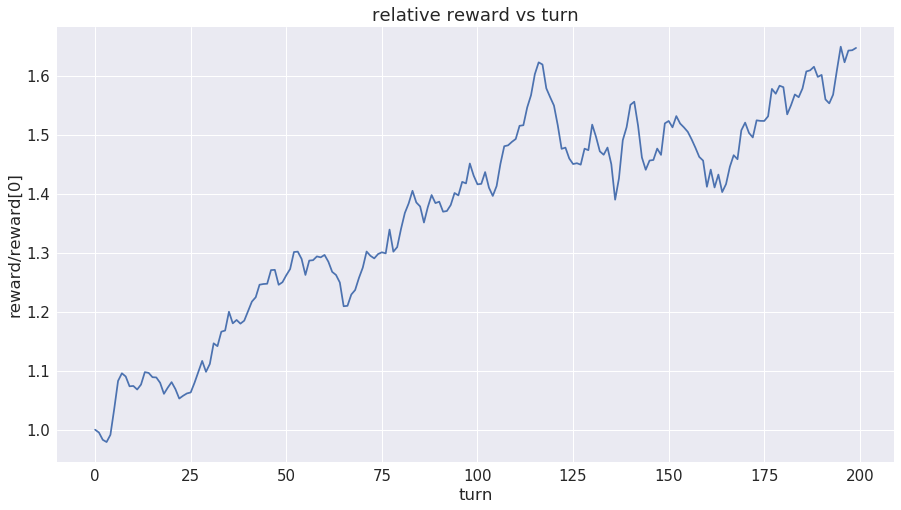

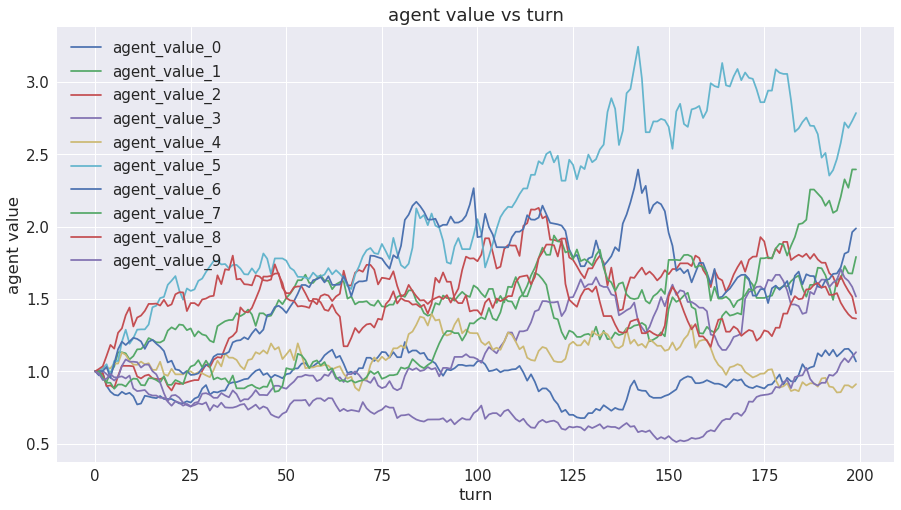

In [9]:
#play a low-risk, low-reward game with all agents moving randomly among the lower third of buckets
strategy = 'low'
memories = play_one_game(environment, strategy)
game_history = memories2timeseries(memories, environment)
df = game_history
xp = df['turn']
yp = df['reward']/df['reward'][0]
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('relative reward vs turn')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('reward/reward[0]')
p = ax.plot(xp, yp)
#plot agents value versus turn
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('agent value vs turn')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('agent value')
for col in df.columns:
    if ('agent_value_' in col):
        yp = df[col]
        p = ax.plot(xp, df[col], label=col)
p = ax.legend()

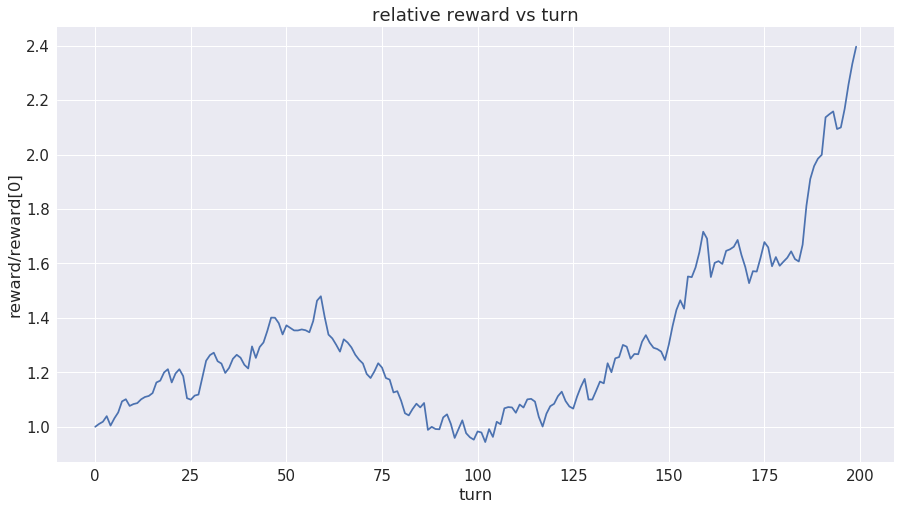

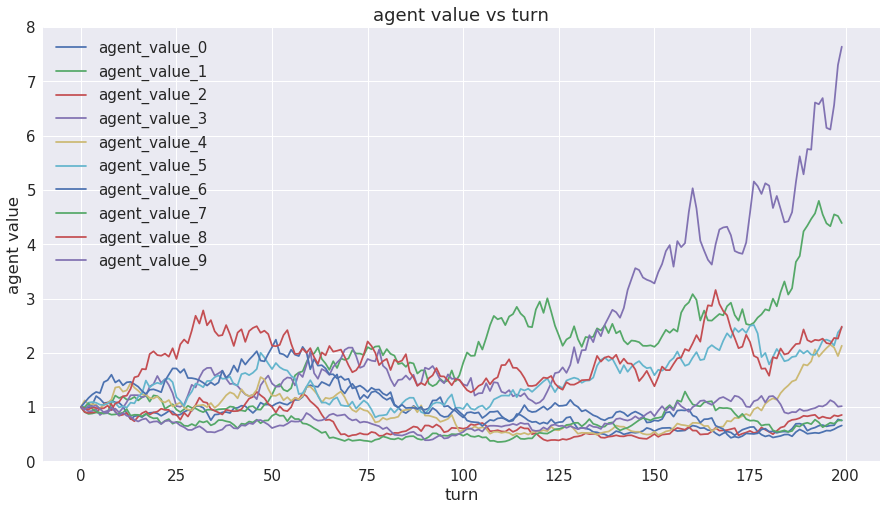

In [10]:
#play a medium-risk, medium-reward game with all agents moving randomly among the middle third of buckets
strategy = 'middle'
memories = play_one_game(environment, strategy)
game_history = memories2timeseries(memories, environment)
df = game_history
xp = df['turn']
yp = df['reward']/df['reward'][0]
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('relative reward vs turn')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('reward/reward[0]')
p = ax.plot(xp, yp)
#plot agents value versus turn
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('agent value vs turn')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('agent value')
for col in df.columns:
    if ('agent_value_' in col):
        yp = df[col]
        p = ax.plot(xp, df[col], label=col)
p = ax.legend()

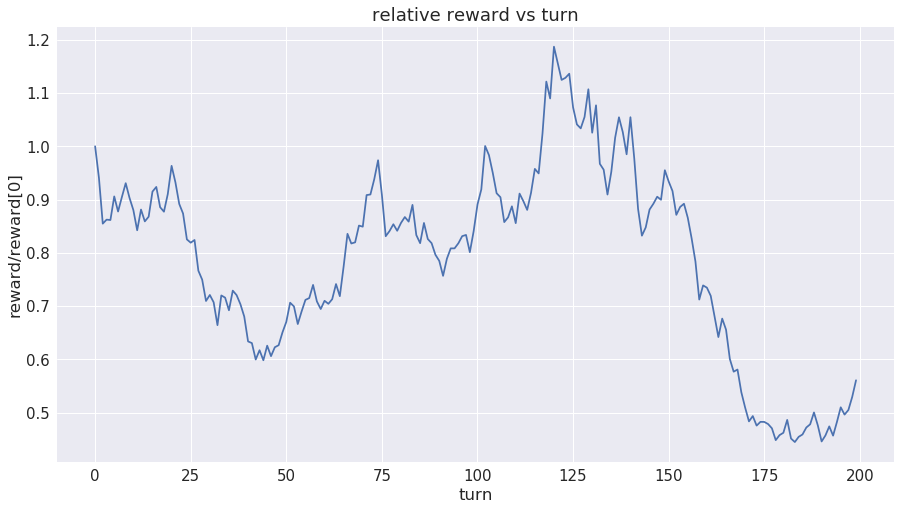

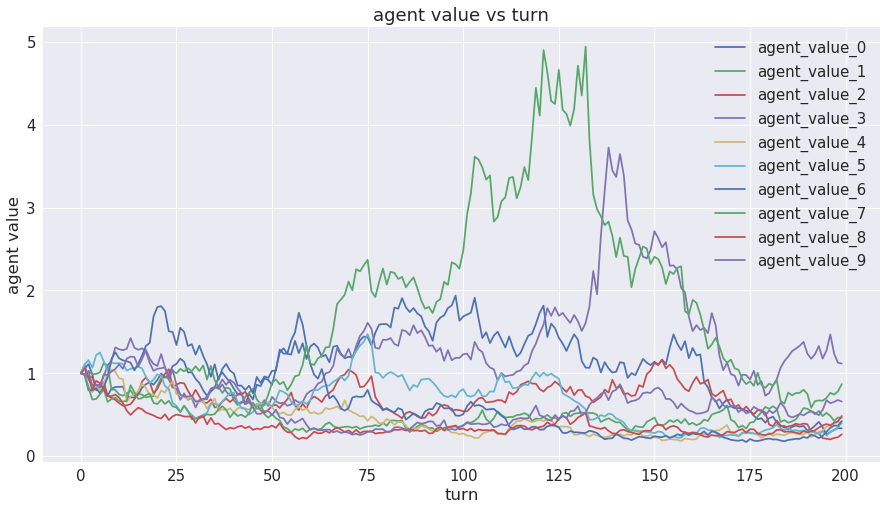

In [11]:
#play a high-risk, high-reward game with all agents moving randomly among the upper third of buckets
strategy = 'high'
memories = play_one_game(environment, strategy)
game_history = memories2timeseries(memories, environment)
df = game_history
xp = df['turn']
yp = df['reward']/df['reward'][0]
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('relative reward vs turn')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('reward/reward[0]')
p = ax.plot(xp, yp)
#plot agents value versus turn
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('agent value vs turn')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('agent value')
for col in df.columns:
    if ('agent_value_' in col):
        yp = df[col]
        p = ax.plot(xp, df[col], label=col)
p = ax.legend()

In [15]:
#play 100 games using each strategy, and generate stats for each strategy
N_games = 100
strategies = ['low', 'middle', 'random', 'high']#, 'best']
game_histories = pd.DataFrame()
for strategy in strategies:
    print 'strategy = ', strategy 
    for game in range(N_games):
        turn = 0
        memories = play_one_game(environment, strategy)
        game_history = memories2timeseries(memories, environment)
        game_history['strategy'] = strategy
        game_history['game'] = game
        game_histories = game_histories.append(game_history)
game_stats = game_histories.groupby(['strategy', 'turn'])['reward'].agg(['mean', 'std'])
game_stats['std'] /= np.sqrt(N_games - 1)
game_stats.tail()

strategy =  low
strategy =  middle
strategy =  random
strategy =  high


mean       std
strategy turn                     
random   195   18.683520  0.824091
         196   18.675444  0.816757
         197   18.698198  0.826337
         198   18.759905  0.829491
         199   18.816785  0.831200

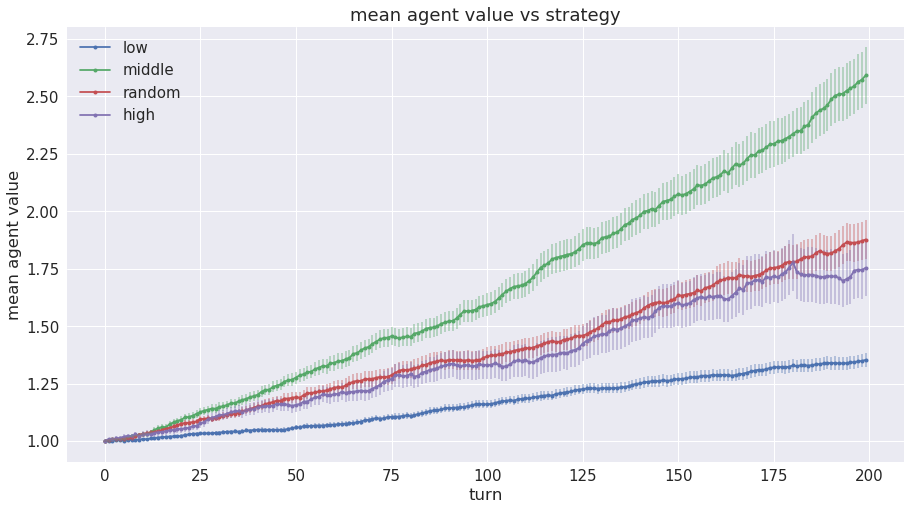

In [16]:
#plot average agent value vs turn, for each strategy
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('mean agent value vs strategy')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('mean agent value')
for strategy in strategies:
    reward = game_stats['mean'][strategy]
    std = game_stats['std'][strategy]
    std /= reward[0]
    reward /= reward[0]
    xp = reward.index
    yp = reward.values
    err = std.values
    p = ax.plot(xp, yp, label=strategy, markersize=4, marker='o')
    ax.errorbar(xp, yp, yerr=std, alpha=0.4, color=p[0].get_color())
p = ax.legend()

In [14]:
stop-notebook

NameError: name 'stop' is not defined

In [ ]:
#play 10 games making random actions, and stash moves in memories queue
N_games = 10
strategy = 'random'
memories = play_N_games(environment, strategy, N_games)
print 'number of memories = ', len(memories)

In [ ]:
#build queue of actions and rewards
N_actions = 10
actions_list = []
for memory in memories:
    turn, state, locations, state_next, reward, game_state = memory
    locations.sort()
    actions_list += [(locations, reward)]
actions = deque(maxlen=N_actions)
for j in range(N_actions):
    actions.append(random.choice(actions_list))
actions

In [ ]:
#build model
N_inputs = state_vector.shape[1]
N_outputs = N_actions
N_neurons = 100
model = build_model(N_inputs, N_neurons, N_outputs)
print model.summary()

In [ ]:
break notebook

In [ ]:
#train model
N_games = 20                               #number of games played during training
gamma = 0.85                                #discount for future rewards
batch_size = 100                             #number of memories used during experience-replay
debug = False                               #set True to see stats about each game's final turn
print 'batch_size = ', batch_size
print 'training model'
trained_model, game, rewards, epsilon = train(environment, model, N_games, gamma, memories, actions, batch_size, debug=debug)
print '\ntraining done'

In [ ]:
#plot rewards vs training game
fig, ax = plt.subplots(1,1, figsize=(15, 6))
xp = game
yp = rewards
p = ax.plot(xp, yp)
p = ax.set_title('reward vs training game')
p = ax.set_xlabel('game')
p = ax.set_ylabel('final reward')

In [ ]:
#plot epsilon vs game_number
fig, ax = plt.subplots(1,1, figsize=(15, 6))
xp = game
yp = epsilon
p = ax.plot(xp, yp)
p = ax.set_title('epsilon vs game number')
p = ax.set_xlabel('game number')
p = ax.set_ylabel('epsilon')

In [ ]:
#play one smart game
strategy = 'smart'
memories = play_one_game(environment, turn, strategy, model=trained_model)
game_history = memories2timeseries(memories, environment)
fig, ax = plt.subplots(1,1, figsize=(15, 6))
xp = game_history['turn']
yp = game_history['reward']
p = ax.plot(xp, yp)
p = ax.set_title('reward vs turn')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('reward')
game_history.head()

In [ ]:
#show grayscale of agent locations
cols = [col for col in game_history.columns if ('agents_' in col)]
df = game_history[cols]
fig, ax = plt.subplots(1,1, figsize=(15, 6))
plt.imshow(df.T, aspect='auto', cmap='gray')
df.tail(10)

In [ ]:
#plot bucket rewards versus turn
cols = ['turn'] + [col for col in game_history.columns if ('reward_' in col)]
df = game_history[cols].drop_duplicates()
cols = cols[1:]
fig, ax = plt.subplots(1,1, figsize=(15, 11))
p = ax.set_title('bucket rewards')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('reward')
p = ax.set_xlim(0, df['turn'].max() + 40)
for col in cols:
    p = ax.plot(df['turn'], df[col], alpha=0.8, linewidth=1, label=col)
p = ax.legend(loc='lower right')

In [ ]:
#done!
time_stop = time.time()
print 'execution time (minutes) = ', (time_stop - time_start)/60.0